In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn import cluster

# Load dataset 

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Visualizations

## Univariate Analysis

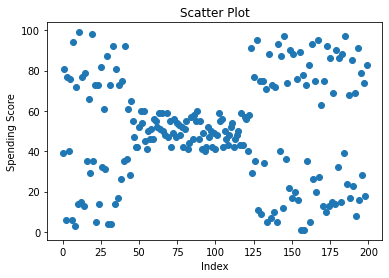

In [5]:
plt.title('Scatter Plot')

plt.xlabel('Index')
plt.ylabel('Spending Score')

plt.scatter(df.index, df['Spending Score (1-100)'])

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

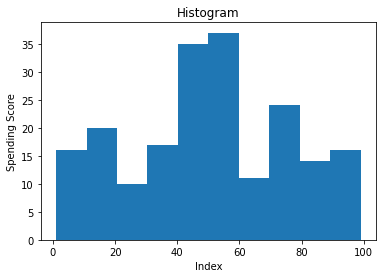

In [6]:
plt.title('Histogram')

plt.xlabel('Index')
plt.ylabel('Spending Score')
plt.hist(df['Spending Score (1-100)'])

## Bi - Variate Analysis

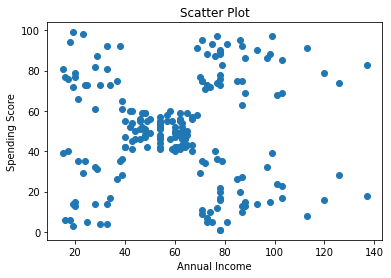

In [7]:
plt.title('Scatter Plot')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])

In [8]:
#Correlation Coefficients
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


## Multi - Variate Analysis

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

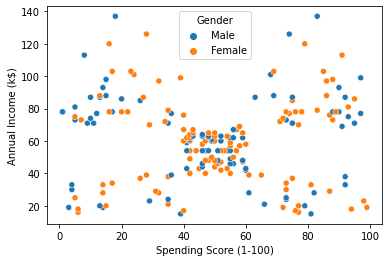

In [9]:
sns.scatterplot(data = df, y = 'Annual Income (k$)', x = 'Spending Score (1-100)', hue = 'Gender')

# Descriptive Statistics 

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Handle Missing Values

In [11]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [12]:
# There are no null values
# In case any null values,
# df[<column_name>] = df[<column_name>].fillna(df[<column_name>].mean())

# Outliers

<AxesSubplot:xlabel='Annual Income (k$)'>

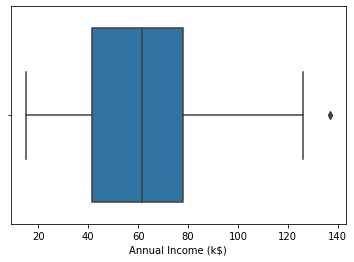

In [13]:
# Identify the outliers
sns.boxplot(df['Annual Income (k$)'],data=df)

<AxesSubplot:xlabel='Annual Income (k$)'>

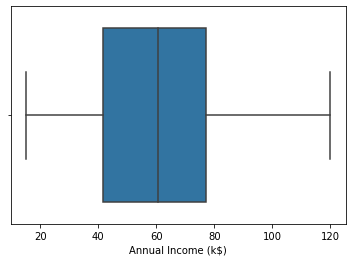

In [14]:
# Outliers is identified as values greater than 125
# Replacing them with Mean

df['Annual Income (k$)'] = np.where(df['Annual Income (k$)']>125, df['Annual Income (k$)'].mean(), df['Annual Income (k$)'])
sns.boxplot(df['Annual Income (k$)'])

# Categorical Columns and Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


# Scaling

In [16]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X=df)
X_scaled=pd.DataFrame(scaled,columns=df.columns)
X_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.009524,0.051020
3,0.015075,0.0,0.096154,0.009524,0.775510
4,0.020101,0.0,0.250000,0.019048,0.397959


# Clustering Algorithm

In [17]:
error=[]
for i in range(1,15):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

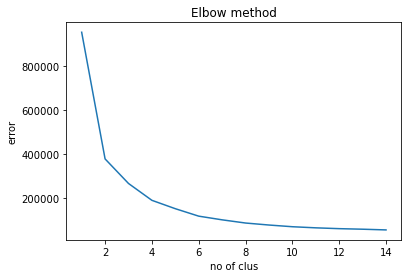

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(1,15),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

In [19]:
km_model=cluster.KMeans(n_clusters=11,init='k-means++',random_state=2)
km_model.fit(df)

KMeans(n_clusters=11, random_state=2)

In [20]:
target=km_model.predict(df)
target

array([ 1,  9,  1,  9,  1,  9,  1,  9,  1,  9,  1,  9,  1,  9,  1,  9,  1,
        9,  1,  9,  1,  9,  1,  9,  1,  9,  1,  9,  1,  9,  1,  9,  1,  9,
        1,  9,  1,  9,  1,  9,  7,  9,  7,  3,  7,  3,  7,  3,  3,  3,  7,
        3,  3,  7,  7,  7,  7,  7,  3,  7,  7,  3,  7,  7,  7,  3,  7,  7,
        3,  3,  7,  7,  7,  7,  7,  4,  7,  7,  4,  7,  7,  4,  7,  7,  4,
        2,  2,  4,  4,  2,  2,  4,  2,  4,  4,  4,  2,  4,  2,  4,  4,  2,
        2,  4,  2,  4,  2,  2,  2,  2,  2,  4, 10,  4,  4,  4,  2,  2,  2,
        2, 10, 10, 10,  6, 10,  6, 10,  6,  5,  6,  5,  6, 10,  6,  5,  6,
        5,  6,  5,  6,  5,  6, 10,  6,  5,  6, 10,  6,  5,  6,  5,  6,  5,
        6,  5,  6,  5,  6,  5,  6,  8,  6,  5,  6,  8,  0,  8,  0,  8,  0,
        8,  0,  8,  0,  8,  0,  8,  0,  8,  0,  8,  0,  8,  0,  8,  0,  8,
        0,  8,  0,  8,  0,  8,  0,  8,  0,  8,  0,  8,  0])

# Adding Cluster to Primary Dataset

In [21]:
df['Target Customers']=target
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target Customers
0,1,1,19,15.00,39,1
1,2,1,21,15.00,81,9
2,3,0,20,16.00,6,1
3,4,0,23,16.00,77,9
4,5,0,31,17.00,40,1
...,...,...,...,...,...,...
195,196,0,35,120.00,79,0
196,197,0,45,60.56,28,8
197,198,1,32,60.56,74,0
198,199,1,32,60.56,18,8


# Dependent and Independent variables.

In [22]:
# Spending Score is a dependent variable 
dep_var = df['Spending Score (1-100)']
dep_var

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [23]:
# Age is an independent variable
y = df['Age']
y

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

In [24]:
X=df.drop(columns = ['Age'], axis=1)
X.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100),Target Customers
0,1,1,15.0,39,1
1,2,1,15.0,81,9
2,3,0,16.0,6,1
3,4,0,16.0,77,9
4,5,0,17.0,40,1


# Train, Test Data Split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,dep_var,test_size=0.3,random_state=2)

In [26]:
X_train.shape, X_test.shape

((140, 5), (60, 5))

In [27]:
y_train.shape, y_test.shape

((140,), (60,))

In [28]:
X_test.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
112,0.562814,0.0,0.384615,0.466667,0.418367
29,0.145729,0.0,0.096154,0.133333,0.877551
182,0.914573,1.0,0.538462,0.790476,0.142857
199,1.000000,1.0,0.230769,0.433905,0.836735
193,0.969849,0.0,0.384615,0.933333,0.918367


In [29]:
X_train.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
28,0.140704,0.0,0.423077,0.133333,0.306122
133,0.668342,0.0,0.250000,0.542857,0.714286
94,0.472362,0.0,0.269231,0.428571,0.418367
42,0.211055,1.0,0.576923,0.228571,0.357143
169,0.849246,1.0,0.269231,0.685714,0.632653


In [30]:
y_test.head()

112    42
29     87
182    15
199    83
193    91
Name: Spending Score (1-100), dtype: int64

In [31]:
y_train.head()

28     31
133    71
94     42
42     36
169    63
Name: Spending Score (1-100), dtype: int64

# Build the Model

In [32]:
Model = LinearRegression()

In [33]:
Model.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred_test=Model.predict(X_test)

In [35]:
y_pred_train=Model.predict(X_train)

# Train the Model

In [36]:
print('Training Accuracy',np.sqrt(mean_squared_error(y_pred_train, y_train)))

Training Accuracy 1.3038089481749028e-14


# Test the Model

In [37]:
print('Testing Accuracy',np.sqrt(mean_squared_error(y_pred_test, y_test)))

Testing Accuracy 1.3122316408622115e-14


# Performance Measurement

In [38]:
pd.crosstab(y_test,y_pred_test)

col_0,3.0,5.0,5.0,6.0,6.0,9.0,10.0,11.0,13.0,13.0,...,77.0,81.0,82.0,83.0,86.0,87.0,91.0,92.0,93.0,99.0
Spending Score (1-100),,,,,,,,,,,,,,,,,,,,,
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
